# ORM (Object Relational Mapping)
### 메모리와 데이터베이스의 연결

ORM(Object-relational mapping)을 단순하게 표현하면 객체와 관계와의 설정이라 할 수 있다. ORM에서 말하는 객체(Object)의 의미는 우리가 흔히 알고 있는 OOP(Object_Oriented Programming)의 그 객체를 의미한다는 것을 쉽게 유추할 수 있을 것이다.

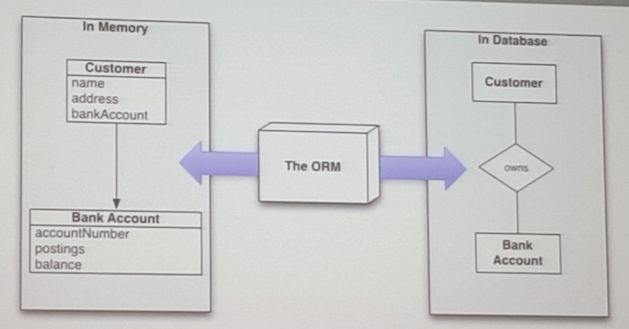

## 왜 ORM을 써야 하는가

- Mismatch between the object model and the relational database
    - RDBSs represent data in tablar format
    - Objected-Oriented languages represent dada as an interconnected graph of objects
- ORM frees the programmer from dealing with simple repetitive database queries
- Automatically mapping the database to business objects
- Focus more on business problems and less with data storage

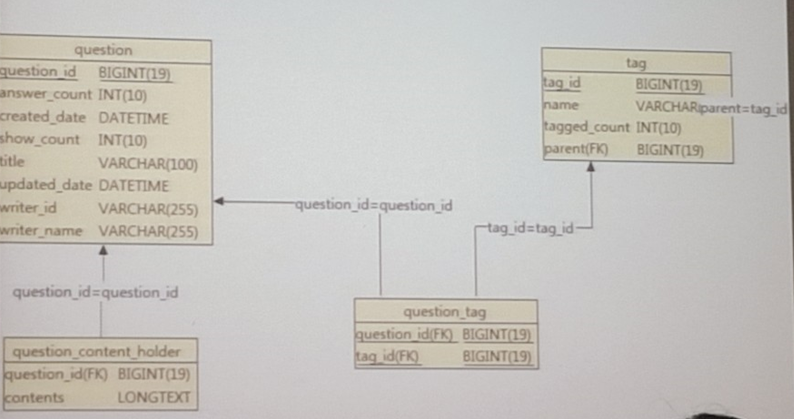

In [1]:
import sqlite3

## 질문 추가 시
- 질문 등록
- 태그 등록
    - 태그 풀에서 해당 태크 ID 가져오기
    - 태그 풀에서 해당 태그 수 증갛마기

- 질문 올리는 커리 

    - INSERT INTO QUESTION VALUES(?, ?, ?, ?, ?); -> question_id = 1
    - SELECT tab_id, name FROM tab WHRER name ="python";  -> tag_id  = 1
    - SELECT tab_id, name FROM tab WHRER name ='alchemy'; -> tag_id  = 2
    - INSERT INTO question_tag VALUES(1, 1);
    - INSERT INTO auestion_tag VALUES(2, 1);
    - UPDATE tag SET tagged_count = tagged_count + 1 where name = 'python'
    - UPDATE tag SET tagged_count = tagged_count + 1 where name = 'alchemy'

- 태그가 추가되면 +1, 태그가 삭제되면 -1

# ORM in python
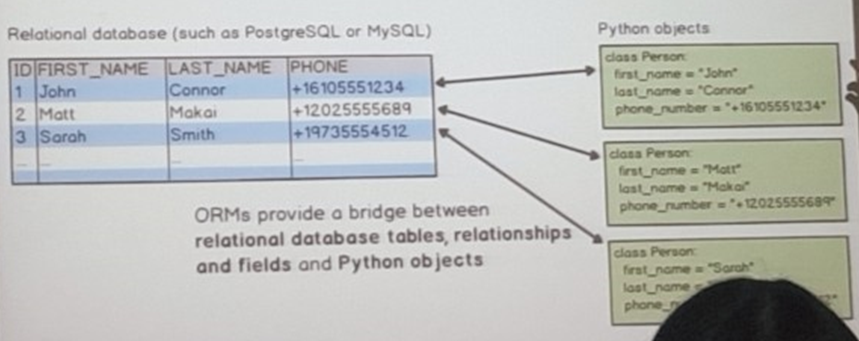
- 클래스만으로 접근이 가능하다

## SQLAlchempy
- well-regarded database tookit and ORM implementation written in Python
- provides a generalized interface for creating and executing database-agnostic code without needing to write SQL statements

## SQLAlchemy CORE
#### Engine
- Starting point for any SQLAlchemy application
- a registry which provides connectivity to a particular database server

#### Dialect
- interprets generic SQL and database commands

#### Connection Pool
- holds collection of database connections in memory 

In [5]:
import sqlalchemy

In [9]:
sqlalchemy.__version__

'1.2.15'

## create engine

In [85]:
from sqlalchemy import create_engine

engine = create_engine('sqlite://', echo = True)
# sqlite:///:memory:
# sqlite:///test.db 도 가능
print(engine)


Engine(sqlite://)


In [15]:
# 유저네임 없고 password 없고, port없고 database 없이 할 수 있는 방법

In [86]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///test.db', echo = True)
print(engine)


Engine(sqlite:///test.db)


In [18]:
# 이렇게 해서 접근 준비를 끝낸다

## Create

 **Table**
 > class sqlalchemy.schema.Table(*args,**kw)

 **Column**
 > class sqlalchemy.schema.Column(*args, **kwargs)

 **Metadata**
 > class sqlal.schema.MetaData

    - A collection of Table objects
    - 무엇이 들어있는지 보려면 MetaData Table을 활용

In [35]:
# &nbsp;

In [87]:
from sqlalchemy import Table, Column, Integer, String, MetaData, ForeignKey

metadata = MetaData()
users = Table('users', metadata,
    Column('id', Integer, primary_key=True),
    Column('name', String),
    Column('fullname', String),
)

addresses = Table('addresses', metadata,
    Column('id', Integer, primary_key=True),
    Column('user_id', None, ForeignKey('users.id')),
    Column('email_address', String, nullable=False)
)

# metadata.create_all(engine)

In [88]:
metadata.tables

immutabledict({'users': Table('users', MetaData(bind=None), Column('id', Integer(), table=<users>, primary_key=True, nullable=False), Column('name', String(), table=<users>), Column('fullname', String(), table=<users>), schema=None), 'addresses': Table('addresses', MetaData(bind=None), Column('id', Integer(), table=<addresses>, primary_key=True, nullable=False), Column('user_id', Integer(), ForeignKey('users.id'), table=<addresses>), Column('email_address', String(), table=<addresses>, nullable=False), schema=None)})

In [89]:
metadata.bind

In [90]:
metadata.create_all(engine)

2019-07-09 11:44:44,315 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-07-09 11:44:44,317 INFO sqlalchemy.engine.base.Engine ()
2019-07-09 11:44:44,321 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-07-09 11:44:44,323 INFO sqlalchemy.engine.base.Engine ()
2019-07-09 11:44:44,326 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("users")
2019-07-09 11:44:44,328 INFO sqlalchemy.engine.base.Engine ()
2019-07-09 11:44:44,334 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("addresses")
2019-07-09 11:44:44,336 INFO sqlalchemy.engine.base.Engine ()


In [70]:
# 일하라고 시키는 순간 해석이 되면서 sql문으로 바뀌는지 확인 후 table이 만들어질 것이다
# commit도 자동으로 해줬다

## insert
**insert**
- represents an insert construct
- generate an insert() construct against this TableClause

**compile**
- compile this SQL expression


In [91]:
insert = users.insert()
print(insert) 
# 커리인지 확인

insert = users.insert().values(name = 'kim', fullname= 'Anonymous, Kim')
print(insert)

insert.compile().params

INSERT INTO users (id, name, fullname) VALUES (:id, :name, :fullname)
INSERT INTO users (name, fullname) VALUES (:name, :fullname)


{'name': 'kim', 'fullname': 'Anonymous, Kim'}

## Executing
**Connection**
- provides high-level functionally for a wrapped DB-API connection

**execute**


In [83]:
del(engine)

In [92]:
conn = engine.connect()
conn

insert.bind = engine
str(insert)

cur = conn.execute(insert) #result가 프락시(커서 객체)
cur.inserted_primary_key

2019-07-09 11:44:51,644 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, fullname) VALUES (?, ?)
2019-07-09 11:44:51,647 INFO sqlalchemy.engine.base.Engine ('kim', 'Anonymous, Kim')
2019-07-09 11:44:51,653 INFO sqlalchemy.engine.base.Engine COMMIT


[9]

In [115]:
# execute의 params 사용
insert = users.insert()
cur = conn.execute(insert, name="lewwwwe", fullname="Unkdfsn,Lee")
cur.inserted_primary_key

2019-07-09 13:27:46,086 INFO sqlalchemy.engine.base.Engine INSERT INTO users (name, fullname) VALUES (?, ?)
2019-07-09 13:27:46,089 INFO sqlalchemy.engine.base.Engine ('lewwwwe', 'Unkdfsn,Lee')
2019-07-09 13:27:46,095 INFO sqlalchemy.engine.base.Engine COMMIT


[11]

In [116]:
# 한번에 여러 execute 뽑아오기
conn.execute(addresses.insert(),[{"user_id":1, "email_address":"a@com"},{"user_id":2, "email_address":"b@com"}])

2019-07-09 13:27:47,324 INFO sqlalchemy.engine.base.Engine INSERT INTO addresses (user_id, email_address) VALUES (?, ?)
2019-07-09 13:27:47,327 INFO sqlalchemy.engine.base.Engine ((1, 'a@com'), (2, 'b@com'))
2019-07-09 13:27:47,332 INFO sqlalchemy.engine.base.Engine COMMIT


In [76]:
type(users)

sqlalchemy.sql.schema.Table

In [117]:
from sqlalchemy.sql import select
cur = conn.execute(select([users]))
cur.fetchall()

2019-07-09 13:27:56,245 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.fullname 
FROM users
2019-07-09 13:27:56,248 INFO sqlalchemy.engine.base.Engine ()


[(1, 'kim', 'Anonymous, Kim'),
 (2, 'lee', 'Unknown,Lee'),
 (3, None, None),
 (4, 'lee', 'Unknown,Lee'),
 (5, 'kim', 'Anonymous, Kim'),
 (6, 'lee', 'Unknown,Lee'),
 (7, None, None),
 (8, 'lee', 'Unknown,Lee'),
 (9, 'kim', 'Anonymous, Kim'),
 (10, 'lee', 'Unknown,Lee'),
 (11, 'lewwwwe', 'Unkdfsn,Lee')]

In [118]:
from sqlalchemy import and_, or_, not_
print(users.c.id == address.c.user_id)
print(users.c.id == 1)
print((users.c.id == 1).compile().params)
print(or_(users.c.id == address.c.user_id, users.c.id == 1)) # c는 columns
print(and_(users.c.id == address.c.user_id, users.c.id ==1))
print(and_(or_(users.c.id == address.c.user_id, users.c.id == 1), addresses.c.email_address.like("a%")))

users.id = addresses.user_id
users.id = :id_1
{'id_1': 1}
users.id = addresses.user_id OR users.id = :id_1
users.id = addresses.user_id AND users.id = :id_1
(users.id = addresses.user_id OR users.id = :id_1) AND addresses.email_address LIKE :email_address_1


In [119]:
result = conn.execute(select([users]).where(users.c.id==1))

for row in result:
    print(row)
    
result = conn.execute(select([users, address]).where(users.c.id==address.c.user_id).where(users.c.id==address.c.user_id))
                                                                                           
for row in result:
    print(row)                                                                                           
                                                                                          

2019-07-09 13:27:58,994 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.fullname 
FROM users 
WHERE users.id = ?
2019-07-09 13:27:58,996 INFO sqlalchemy.engine.base.Engine (1,)
(1, 'kim', 'Anonymous, Kim')
2019-07-09 13:27:59,003 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.name, users.fullname, addresses.id, addresses.user_id, addresses.email_address 
FROM users, addresses 
WHERE users.id = addresses.user_id AND users.id = addresses.user_id
2019-07-09 13:27:59,005 INFO sqlalchemy.engine.base.Engine ()
(1, 'kim', 'Anonymous, Kim', 1, 1, 'a@com')
(2, 'lee', 'Unknown,Lee', 2, 2, 'b@com')
(1, 'kim', 'Anonymous, Kim', 3, 1, 'a@com')
(2, 'lee', 'Unknown,Lee', 4, 2, 'b@com')


## Join
**return a join from this FromClause to another FromClause**

**on condition of the join, as it's called, was automatically generated based on the ForeginKey object**

In [120]:
print(users.join(addresses))

print(users.join(addresses, users.c.id == addresses.c.user_id)) # pk 값을 미리 설정해주었기 때문에 안 써줘도 된다

users JOIN addresses ON users.id = addresses.user_id
users JOIN addresses ON users.id = addresses.user_id


In [121]:
query = select([users.c.id, users.c.fullname, addresses.c.email_address]).select_from(users.join(addresses))

result = conn.execute(query).fetchall()
for row in result:
    print(row)

2019-07-09 13:28:01,802 INFO sqlalchemy.engine.base.Engine SELECT users.id, users.fullname, addresses.email_address 
FROM users JOIN addresses ON users.id = addresses.user_id
2019-07-09 13:28:01,805 INFO sqlalchemy.engine.base.Engine ()
(1, 'Anonymous, Kim', 'a@com')
(2, 'Unknown,Lee', 'b@com')
(1, 'Anonymous, Kim', 'a@com')
(2, 'Unknown,Lee', 'b@com')


# engine에 바인딩해서 자동으로 다시 만들어주자
## 없애야

In [122]:
metadata.tables

immutabledict({'users': Table('users', MetaData(bind=None), Column('id', Integer(), table=<users>, primary_key=True, nullable=False), Column('name', String(), table=<users>), Column('fullname', String(), table=<users>), schema=None), 'addresses': Table('addresses', MetaData(bind=None), Column('id', Integer(), table=<addresses>, primary_key=True, nullable=False), Column('user_id', Integer(), ForeignKey('users.id'), table=<addresses>), Column('email_address', String(), table=<addresses>, nullable=False), schema=None)})

In [123]:
# 없애야한다

In [124]:
metadata.clear()

In [125]:
metadata.tables

immutabledict({})

In [ ]:
engine.